In [1]:
from torchvision import models
import torch
 
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [2]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/jupyter-jiz322/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [3]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [33]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
])

In [34]:
from PIL import Image
img = Image.open("ex8.jpg")

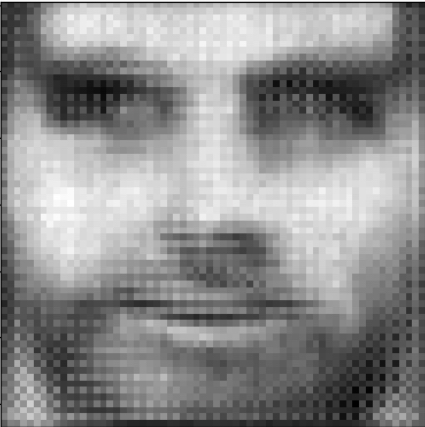

In [35]:
img

In [36]:
img_t = transform(img)

In [37]:
img_t.shape

torch.Size([3, 224, 224])

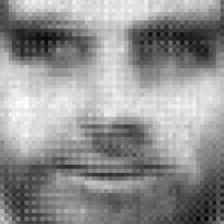

In [38]:
transform_to_image = transforms.ToPILImage()

# convert the tensor to PIL image using above transform
img_tt = transform_to_image(img_t)

# display the PIL image
img_tt

In [39]:
batch_t = torch.unsqueeze(img_t, 0)

In [40]:
alexnet.eval()
out = alexnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [41]:
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

In [42]:
_, index = torch.max(out, 1)
 
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
 
print(classes[index[0]], percentage[index[0]].item())

beaker 3.253049373626709


In [43]:
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('beaker', 3.253049373626709),
 ('paper towel', 2.305605173110962),
 ('measuring cup', 2.237241744995117),
 ('nipple', 2.031297445297241),
 ('window shade', 2.0002474784851074)]

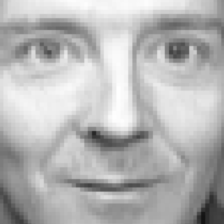

In [44]:
img = Image.open("ex1_real.jpg")
img_t = transform(img)
img_tt = transform_to_image(img_t)
img_tt

In [45]:
batch_t = torch.unsqueeze(img_t, 0)
alexnet.eval()
out = alexnet(batch_t)
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('whiskey jug', 1.8991327285766602),
 ('nipple', 2.031297445297241),
 ('lotion', 0.43620601296424866),
 ('face powder', 0.5882673263549805),
 ('beaker', 3.253049373626709)]

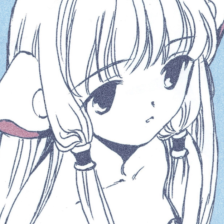

In [46]:
img = Image.open("try.jpg")
img_t = transform(img)
img_tt = transform_to_image(img_t)
img_tt

In [47]:
batch_t = torch.unsqueeze(img_t, 0)
alexnet.eval()
out = alexnet(batch_t)
_, indices = torch.sort(out, descending=True)
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('vault', 0.09409528225660324),
 ('pillow', 0.016759466379880905),
 ('necklace', 0.0019898104947060347),
 ('sundial', 0.004210543353110552),
 ('hand blower', 0.05064539238810539)]